<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# 05 - Practical exercise - Solution - Model II

### About

> Let us now return to the dust event in March 2022. As you recall, the dust outbreak lasted for a week from 15 to 22 March 2022 and extended across the Mediterranean Sea up as far as northern Europe. ([Source](https://www.eumetsat.int/widespread-dust-intrusion-across-europe))

> Today, you will focus on how you can use station observations from AERONET to evaluate model forecasts from CAMS global atmospheric composition forecast and from the SDS-WAS MONARCH model dust forecasts.
While model intercomparison is important, model outcomes also have to be compared with real-world observations. Just by comparing model outcomes with measurements from station data, we can better understand how the model performs.


### Tasks

#### 1. Brainstorm
  * What model datasets do you know about?
  * Which variables do they measure?
  * Which data can you use to evaluate model predictions?
  
#### 2. Download the dust forecast from the MONARCH model
  * Download the dust forecast from the MONARCH model for 15 March 2022
  * **Hint** 
    * [WMO SDS-WAS dust forecast - Example notebook](../04_data_workflows/43_model_data/434_SDS-WAS_MONARCH_dust_forecast.ipynb)
    * [Data access](https://dust.aemet.es/products/data-download)
      * User: `eumetsat-training`
      * Password: `Sod/e3Oi2+cK17Z/`
 
#### 3. Download the CAMS global atmospheric composition forecast
  * Download the CAMS global atmospheric composition forecast for 15 March 2022, with the following specifications:
    > Variable on single levels: `Dust aerosol optical depth at 550 nm` <br>
    > Date (Start and end): `2022-03-15` <br>
    > Time: `12:00` <br>
    > Leadtime hour: every three hours from `0 to 90` <br>
    > Type: `Forecast` <br>
    > Restricted area: `N: 71, W: -22, E: 43, S: 28` <br>
    > Format: `Zipped netCDF` <br>
  * **Hint** 
    * [CAMS global atmospheric composition forecasts - Example notebook](../04_data_workflows/43_model_data/431_CAMS_global_forecast_duaod_load_browse.ipynb)
    * [Data access](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts)

#### 4. Look up the coordinates of the AERONET station *Coruna, Spain*
  * **Hint**
    * You can see an overview of all available AERONET Site Names [here](https://aeronet.gsfc.nasa.gov/cgi-bin/draw_map_display_aod_v3?long1=-180&long2=180&lat1=-90&lat2=90&multiplier=2&what_map=4&nachal=1&formatter=0&level=3&place_code=10&place_limit=0)

#### 5. Select the time-series for CAMS global atmospheric composition forecasts for *Coruna, Spain*
  * **Hint**
    * With the xarray function `sel()` and keyword argument `method='nearest'` you can select data based on coordinate information
    * We also recommend you to transform your xarray.DataArray into a pandas.DataFrame with the function `to_dataframe()` and save it as `csv` with the function `to_csv()`

#### 6. Load the MONARCH dust forecasts and select time-series for *Coruna, Spain*
  * **Hint**
    * With the xarray function `sel()` and keyword argument `method='nearest'` you can select data based on coordinate information
    * We also recommend you to transform your xarray.DataArray into a pandas.DataFrame with the function `to_dataframe()` and save it as `csv` with the function `to_csv()`

#### 7. Download and plot time-series of AERONET data for *Coruna, Spain*
  * Download and visualise AERONET v3.0 measurements for all points of the station *Coruna, Spain* for 15 to 22 March 2022.
  * The data type we will download and plot today is `SDA20`. This contains the coarse particle AOD which indicates the presence of dust.
  * You will need to modify the download URL code. Use this code instead: `url = '{endpoint}?site={station}&year={year}&month={month}&day={day}&year2={year2}&month2={month2}&day2={day2}&SDA15={SDA15}&AVG={AVG}'.format(**data_dict)
url`
  * **Some questions to reflect on**
    * Under which name is the station listed in AERONET?
    * What average level would you choose?
    * Which days do we have observations for? You can plot the data as a time-series to see which days are missing.
  * **Hint** 
    * [AERONET observations - Example notebook](../04_data_workflows/42_groundbased_observations/421_AERONET.ipynb)

#### 8. Resample AERONET data to a 3-hourly resolution
  * Make use of AERONET `index` and `time` columns to create a `DateTimeIndex` in order to resample the observations to a 3-hourly temporal resolution
  * **Hint**
    * you have to combine the two columns `index` and `time` as one string variable
    * you can use the pandas function `to_datetime()` to create a `DateTimeIndex` and the function `resample().mean()` to resample and average the time-series to a given temporal resolution 
  * **Question to reflect on**
    * How many row entries does the resampled data frame have?

#### 9. Load time-series of the forecasts from CAMS and the MONARCH model 

#### 10. Plot both model forecasts with the AERONET observations

#### 11. Interpret the plotting result.
  * Can you make a statement about the performance of the two forecast models?
  * What are your conclusions regarding AERONET observation data?
  * Compare these results with the SEVIRI Dust RGB [online](https://sds-was.aemet.es/forecast-products/dust-observations/msg-2013-eumetsat) and the MODIS Natural Colour RGB [online](https://go.nasa.gov/3WTHjOW). Why is it a good idea to use model, ground-based and satellite observations together?

### Module outline
* [1 - Download the dust forecast from the MONARCH model](#download_sds_was)
* [2 - Download the CAMS global atmospheric composition forecast](#download_cams_forecast)
* [3 - Select latitude / longitude values for AERONET station Coruna, Spain](#select_lat_lon)
* [4 - Select time-series for CAMS global atmospheric composition forecasts](#ts_cams)
* [5 - Load the MONARCH dust forecasts and select time-series](#sdswas_forecast_load)
* [6 - Download and plot time-series of AERONET data](#download_aeronet)
* [7 - Resample AERONET data to a 3-hourly resolution](#resample_aeronet)
* [8 - Load time series of forecasts from CAMS and the MONARCH model](#model_timeseries)
* [9 - Plot both model forecasts with the AERONET observations](#compare_model_observations)


<hr>

##### Load required libraries

In [1]:
import wget
import pandas as pd

import matplotlib.pyplot as pl
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='download_sds_was'></a>1. Download the dust forecasts from the MONARCH model

Navigate in the data portal to the correct file, then copy the download link and paste it into the example `wget` download code.

In [3]:
#!wget --user="eumetsat-training" --password="Sod/e3Oi2+cK17Z/" "https://dust.aemet.es/thredds/fileServer/dataRoot/MONARCH/2022/03/2022031512_3H_SDSWAS_NMMB-BSC-v2_OPER.nc"

<br>

### <a id='download_cams_forecast'></a>2. Download CAMS global atmospheric composition forecasts 

The `CDS Application Program Interface (CDS API)` is a Python library which allows you to access data from the ADS `programmatically`. In order to use the CDS API, follow the steps below:

* [Self-register](https://ads.atmosphere.copernicus.eu/#!/home) at the ADS registration page (if you do not have an account yet)
* [Login](https://ads.atmosphere.copernicus.eu/user/login) to the ADS portal and go to the [api-how-to page](https://ads.atmosphere.copernicus.eu/api-how-to)
* Copy the CDS API key displayed in the black terminal window and replace the `######` of the `KEY` variable below with your individual CDS API key

**Note:** You find your CDS API key displayed in the black terminal box under the section `Install the CDS API key`. If you do not see a URL or key appear in the black terminal box, please refresh your browser tab. 

In [4]:
URL='https://ads.atmosphere.copernicus.eu/api/v2'
KEY='#########################'

The next step is then to request the data with a so called `API request`. Via the [ADS web interface](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts?tab=form), you can select the data and at the end of the web interface, you can open the ADS request via `Show API request`. Copy the request displayed there in the cell below. Once you execute the cell, the download of the data starts automatically.

In [5]:
'''
import cdsapi

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'variable': 'dust_aerosol_optical_depth_550nm',
        'date': '2022-03-15/2022-03-15',
        'time': '12:00',
        'leadtime_hour': [
            '0', '12', '15',
            '18', '21', '24',
            '27', '3', '30',
            '33', '36', '39',
            '42', '45', '48',
            '51', '54', '57',
            '6', '60', '63',
            '66', '69', '72',
            '75', '78', '81',
            '84', '87', '9',
            '90',
        ],
        'type': 'forecast',
        'format': 'netcdf_zip',
        'area': [
            71, -22, 28,
            43,
        ],
    },
    './20220315_duaod.netcdf_zip')
'''

"\nimport cdsapi\n\nc = cdsapi.Client(url=URL, key=KEY)\n\nc.retrieve(\n    'cams-global-atmospheric-composition-forecasts',\n    {\n        'variable': 'dust_aerosol_optical_depth_550nm',\n        'date': '2022-03-15/2022-03-15',\n        'time': '12:00',\n        'leadtime_hour': [\n            '0', '12', '15',\n            '18', '21', '24',\n            '27', '3', '30',\n            '33', '36', '39',\n            '42', '45', '48',\n            '51', '54', '57',\n            '6', '60', '63',\n            '66', '69', '72',\n            '75', '78', '81',\n            '84', '87', '9',\n            '90',\n        ],\n        'type': 'forecast',\n        'format': 'netcdf_zip',\n        'area': [\n            71, -22, 28,\n            43,\n        ],\n    },\n    './20220315_duaod.netcdf_zip')\n"

The first step is to unzip file from the zipped archive downloaded. If you are using the file you downloaded yourself, please change the file path to the correct one. We have already unzipped the file beforehand, so the following code has been commented out.

In [6]:
#import zipfile
#with zipfile.ZipFile('../../eodata/dust/part2/3_model/cams/global_forecast/20220315_duaod.netcdf_zip', 'r') as zip_ref:
#    zip_ref.extractall('../../eodata/dust/part2/3_model/cams/global_forecast/')

<br>

<br>

### <a id='select_lat_lon'></a>3. Select latitude / longitude values for `Coruna`

You can see an overview of all available AERONET Site Names [here](https://aeronet.gsfc.nasa.gov/cgi-bin/draw_map_display_aod_v3?long1=-180&long2=180&lat1=-90&lat2=90&multiplier=2&what_map=4&nachal=1&formatter=0&level=3&place_code=10&place_limit=0).

In [4]:
lat = 43.363
lon = -8.421

<br>

### <a id='ts_cams'></a>4. Select time-series for CAMS global atmospheric composition forecasts

Then, we can open the netCDF file with the xarray function `open_dataset()`. We see that the data has three dimensions (`latitude`, `longitude`, `time`) and one data variable:
* `duaod550`: Dust Aerosol Optical Depth at 550nm

In [5]:
file = xr.open_dataset('../../eodata/dust/part2/3_model/cams/global_forecast/20220315/data.nc')
file

<xarray.Dataset>
Dimensions:    (longitude: 163, latitude: 108, time: 31)
Coordinates:
  * longitude  (longitude) float32 -22.0 -21.6 -21.2 -20.8 ... 42.0 42.4 42.8
  * latitude   (latitude) float32 70.8 70.4 70.0 69.6 ... 29.2 28.8 28.4 28.0
  * time       (time) datetime64[ns] 2022-03-15T12:00:00 ... 2022-03-19T06:00:00
Data variables:
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-09 10:55:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

<br>

Let us now store the data variable `Dust Aerosol Optical Depth (AOD) at 550nm` as `xarray.DataArray` with the name `du_aod`.

In [6]:
du_aod = file.duaod550
du_aod

<xarray.DataArray 'duaod550' (time: 31, latitude: 108, longitude: 163)>
[545724 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -22.0 -21.6 -21.2 -20.8 ... 42.0 42.4 42.8
  * latitude   (latitude) float32 70.8 70.4 70.0 69.6 ... 29.2 28.8 28.4 28.0
  * time       (time) datetime64[ns] 2022-03-15T12:00:00 ... 2022-03-19T06:00:00
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

From the loaded xarray data array `du_aod`, we can now select the values for one specific point location. We can select coordinate information with the function `sel()`. We have to make sure to set the keyword argument `method='nearest'`. With this keyword argument, the closest grid location in the data array is used for the time-series retrieval.

In [7]:
cams_ts = du_aod.sel(longitude=lon, latitude=lat, method='nearest')
cams_ts

<xarray.DataArray 'duaod550' (time: 31)>
array([0.476617, 0.473984, 0.372591, 0.420837, 0.403681, 0.391608, 0.261348,
       0.180016, 0.132632, 0.068546, 0.028742, 0.012267, 0.005595, 0.002872,
       0.001828, 0.000739, 0.000739, 0.001011, 0.002418, 0.010043, 0.024748,
       0.031829, 0.046897, 0.048849, 0.028016, 0.032192, 0.031329, 0.026473,
       0.033372, 0.052616, 0.067775], dtype=float32)
Coordinates:
    longitude  float32 -8.4
    latitude   float32 43.2
  * time       (time) datetime64[ns] 2022-03-15T12:00:00 ... 2022-03-19T06:00:00
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

<br>

Time-series information is better to handle via the Python library [Pandas](https://pandas.pydata.org/). You can use the function `to_dataframe()` to convert a xarray.DataArray into a pandas.DataFrame.

In [8]:
cams_ts_df = cams_ts.to_dataframe()
cams_ts_df

,longitude,latitude,duaod550
time,,,
2022-03-15 12:00:00,-8.4,43.200001,0.476617
2022-03-15 15:00:00,-8.4,43.200001,0.473984
2022-03-15 18:00:00,-8.4,43.200001,0.372591
2022-03-15 21:00:00,-8.4,43.200001,0.420837
2022-03-16 00:00:00,-8.4,43.200001,0.403681
2022-03-16 03:00:00,-8.4,43.200001,0.391608
2022-03-16 06:00:00,-8.4,43.200001,0.261348
2022-03-16 09:00:00,-8.4,43.200001,0.180016
2022-03-16 12:00:00,-8.4,43.200001,0.132632


<br>

The last step is now to safe the pandas dataframe as csv file. This allows us to easily load the time-series again later. You can use the function `to_csv()` to save a pandas.DataFrame as csv.

In [9]:
cams_ts_df.to_csv("./cams_ts.csv", index_label='time')

<br>

### <a id='sdswas_forecast_load'></a>5. Load MONARCH dust forecasts and select time-series

The first step is to load a `MONARCH` forecast file. If you are using the file you downloaded yourself, please change the file path to the correct one. The data is disseminated in the `netCDF` format on a daily basis, with the forecast initialisation at 12:00 UTC. Load the `MONARCH` dust forecast of 15 March 2022. You can use the function `open_dataset()` from the xarray Python library.

Once loaded, you see that the data has three dimensions: `lat`, `lon` and `time`; and offers two data variables `od550_dust` and `sconc_dust`.

In [10]:
filepath = '../../eodata/dust/part2/3_model/sds_was/20220315/2022031512_3H_SDSWAS_NMMB-BSC-v2_OPER.nc'
file = xr.open_dataset(filepath)
file

<xarray.Dataset>
Dimensions:       (time: 25, lon: 1650, lat: 825)
Coordinates:
  * time          (time) datetime64[ns] 2022-03-15T12:00:00 ... 2022-03-18T12...
  * lon           (lon) float64 -63.0 -62.9 -62.8 -62.7 ... 101.7 101.8 101.9
  * lat           (lat) float64 -11.0 -10.9 -10.8 -10.7 ... 71.1 71.2 71.3 71.4
Data variables:
    dust_ext_sfc  (time, lat, lon) float32 ...
    dust_load     (time, lat, lon) float32 ...
    dust_depd     (time, lat, lon) float32 ...
    dust_depw     (time, lat, lon) float32 ...
    sconc_dust    (time, lat, lon) float32 ...
    od550_dust    (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    history:                    Tue Mar 15 21:34:03 2022: cdo -P 4 remapbil,....
    Conventions:                CF-1.6
    comment:                    Generated on marenostrum4
    NCO:                        netCDF Operators version 4.9.2 (Homepage = ht...
    history_of_appended_files:  Tue Mar 15 21:33:57 2022: Appended file od550...
    cdo_openmp_thread_number:   4
    CDO:                        Climate Data Operators version 1.9.8 (https:/...

<br>

Let us then retrieve the data variable `od550_dust`, which is the dust optical depth at 550 nm.

In [11]:
od_dust_sdswas = file['od550_dust']
od_dust_sdswas

<xarray.DataArray 'od550_dust' (time: 25, lat: 825, lon: 1650)>
[34031250 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2022-03-15T12:00:00 ... 2022-03-18T12:00:00
  * lon      (lon) float64 -63.0 -62.9 -62.8 -62.7 ... 101.6 101.7 101.8 101.9
  * lat      (lat) float64 -11.0 -10.9 -10.8 -10.7 -10.6 ... 71.1 71.2 71.3 71.4
Attributes:
    long_name:  Aerosol optical depth
    units:      -

<br>

Now, we can also select the time-series for the location *Coruna* from the WMO SDS-WAS forecast data. We again use the function `sel()` together with the keyword argument `method='nearest'` to select the forecast time-series of the closest grid point.

In [12]:
sds_was_ts = od_dust_sdswas.sel(lon=lon, lat=lat, method='nearest')
sds_was_ts

<xarray.DataArray 'od550_dust' (time: 25)>
array([1.047896e-01, 1.947400e-01, 3.030339e-01, 2.542519e-01, 2.595825e-01,
       2.737115e-01, 3.466450e-01, 1.662441e-01, 6.279884e-02, 1.085640e-01,
       1.036341e-01, 1.029106e-01, 1.592650e-02, 5.603437e-04, 5.264962e-06,
       9.472279e-07, 2.799611e-06, 1.088509e-05, 2.812361e-05, 1.127368e-03,
       9.551530e-02, 7.557494e-02, 6.580809e-02, 5.585172e-02, 1.043946e-01],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-03-15T12:00:00 ... 2022-03-18T12:00:00
    lon      float64 -8.4
    lat      float64 43.4
Attributes:
    long_name:  Aerosol optical depth
    units:      -

<br>

And now, we also want to save the MONARCH forecast time-series as pandas.DataFrame in a csv file. You can combine both functions (`to_dataframe()` and `to_csv`) in one line of code.

In [13]:
sds_was_ts.to_dataframe().to_csv("./sdswas_ts.csv", index_label='time')

<br>

### <a id='download_aeronet'></a>6. Download and plot time-series of AERONET data

As a first step, let us create a Python dictionary in which we store all the parameters we would like to use for the request as dictionary keys. You can initiate a dictionary with curled brackets `{}`. Below, we specify the following parameters:
* `endpoint`: Endpoint of the AERONET web service
* `station`: Name of the AERONET station
* `year`: year 1 of interest
* `month`: month 1 of interest
* `day`: day 1 of interest
* `year2`: year 2 of interest
* `month2`: month 2 of interest
* `day2`: day 2 of interest
* `AOD15`: data type, other options include `AOD10`, `AOD20`, `SDA10`, `SDA15` etc.
* `AVG`: data format, `AVG=10` - all points, `AVG=20` - daily averages

The keywords below are those we will need for requesting all points (`AVG=10`) of Aerosol Optical Depth Level 1.5 data for the station Coruna for 15 to 22 March 2022.

In [14]:
data_dict = {
    'endpoint': 'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3',
    'station':'Coruna',
    'year': 2022,
    'month': 3,
    'day': 15,
    'year2': 2022,
    'month2': 3,
    'day2': 22,
    'SDA20': 1,
    'AVG': 10
}


<br>

In a next step, we construct the final string for the wget request with the `format` function. You construct a string by adding the dictionary keys in curled brackets. At the end of the string, you provide the dictionary key informatoin to the string with the `format()` function. A print of the resulting url shows, that the format function replaced the information in the curled brackets with the data in the dictionary.

Note that you need to change the example provided in the AERONET example notebook slightly, replacing `AOD` with `SDA` in the URL.

In [15]:
url = '{endpoint}?site={station}&year={year}&month={month}&day={day}&year2={year2}&month2={month2}&day2={day2}&SDA20={SDA20}&AVG={AVG}'.format(**data_dict)
url

'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3?site=Coruna&year=2022&month=3&day=15&year2=2022&month2=3&day2=22&SDA20=1&AVG=10'

<br>

Now we are ready to request the data with the function `download()` from the wget Python library. You have to pass to the function the constructed url above together with a file path of where the downloaded that shall be stored.

In [16]:
#wget.download(url, './20210315-22_coruna_SDA20.txt')

'./20210315-22_coruna_SDA20.txt'

<br>

### <a id='resample_aeronet'></a>7. Resample AERONET data to a 3-hourly resolution

After we downloaded the station observations as `txt` file, we can open it with the pandas function `read_table()`. If you are using the file you downloaded yourself, please change the file path. We additonally set specific keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index

You see below that the resulting dataframe has 178 rows and 79 columns.

In [18]:
df = pd.read_table('../../eodata/dust/part2/2_observations/aeronet/20210315-22_coruna_SDA20.txt', delimiter=',', header=[7], index_col=1)
df

,AERONET_Site,Time_(hh:mm:ss),Day_of_Year,Day_of_Year(fraction),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],FineModeFraction_500nm[eta],2nd_Order_Reg_Fit_Error-Total_AOD_500nm[regression_dtau_a],RMSE_Fine_Mode_AOD_500nm[Dtau_f],...,Exact_Wavelengths_of_AOD(um)_412nm,Exact_Wavelengths_of_AOD(um)_400nm,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty<br>
Date_(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
15:03:2022,Coruna,07:51:40,74.0,74.327546,0.244971,0.044348,0.200623,0.181035,0.000876,0.022312,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
15:03:2022,Coruna,07:57:45,74.0,74.331771,0.244783,0.056896,0.187887,0.232434,0.000929,0.025003,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
15:03:2022,Coruna,08:05:07,74.0,74.336887,0.267687,0.065919,0.201768,0.246254,0.000800,0.027456,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
15:03:2022,Coruna,08:14:34,74.0,74.343449,0.289523,0.063586,0.225937,0.219624,0.002564,0.026526,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
15:03:2022,Coruna,08:21:44,74.0,74.348426,0.278128,0.050730,0.227399,0.182397,0.002410,0.025501,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21:03:2022,Coruna,10:27:06,80.0,80.435486,0.195779,0.054874,0.140905,0.280286,0.003620,0.014559,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
21:03:2022,Coruna,10:42:07,80.0,80.445914,0.165621,0.041548,0.124073,0.250860,0.003310,0.011826,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
21:03:2022,Coruna,10:48:14,80.0,80.450162,0.165855,0.042232,0.123622,0.254635,0.003193,0.011765,...,-999.0,-999.0,0.3805,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>


Now, we can inspect the entries in the loaded data frame a bit more. Above you see that the last entry is a NaN entry, which is best to drop with the function `dropna()`.

The next step is then to replace the entries with -999.0 and set them as NaN. We can use the function `replace()` to do so. 

In [19]:
df = df.dropna()
df = df.replace(-999.0, np.nan)
df

,AERONET_Site,Time_(hh:mm:ss),Day_of_Year,Day_of_Year(fraction),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],FineModeFraction_500nm[eta],2nd_Order_Reg_Fit_Error-Total_AOD_500nm[regression_dtau_a],RMSE_Fine_Mode_AOD_500nm[Dtau_f],...,Exact_Wavelengths_of_AOD(um)_412nm,Exact_Wavelengths_of_AOD(um)_400nm,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty<br>
Date_(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
15:03:2022,Coruna,07:51:40,74.0,74.327546,0.244971,0.044348,0.200623,0.181035,0.000876,0.022312,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
15:03:2022,Coruna,07:57:45,74.0,74.331771,0.244783,0.056896,0.187887,0.232434,0.000929,0.025003,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
15:03:2022,Coruna,08:05:07,74.0,74.336887,0.267687,0.065919,0.201768,0.246254,0.000800,0.027456,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
15:03:2022,Coruna,08:14:34,74.0,74.343449,0.289523,0.063586,0.225937,0.219624,0.002564,0.026526,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
15:03:2022,Coruna,08:21:44,74.0,74.348426,0.278128,0.050730,0.227399,0.182397,0.002410,0.025501,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21:03:2022,Coruna,09:02:29,80.0,80.376725,0.206901,0.055823,0.151077,0.269807,0.002188,0.016236,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
21:03:2022,Coruna,10:27:06,80.0,80.435486,0.195779,0.054874,0.140905,0.280286,0.003620,0.014559,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
21:03:2022,Coruna,10:42:07,80.0,80.445914,0.165621,0.041548,0.124073,0.250860,0.003310,0.011826,...,NaN,NaN,0.3805,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>


We can now plot the column `Coarse_Mode_AOD_500nm[tau_c]` as time-series. What is striking in the resulting plot?

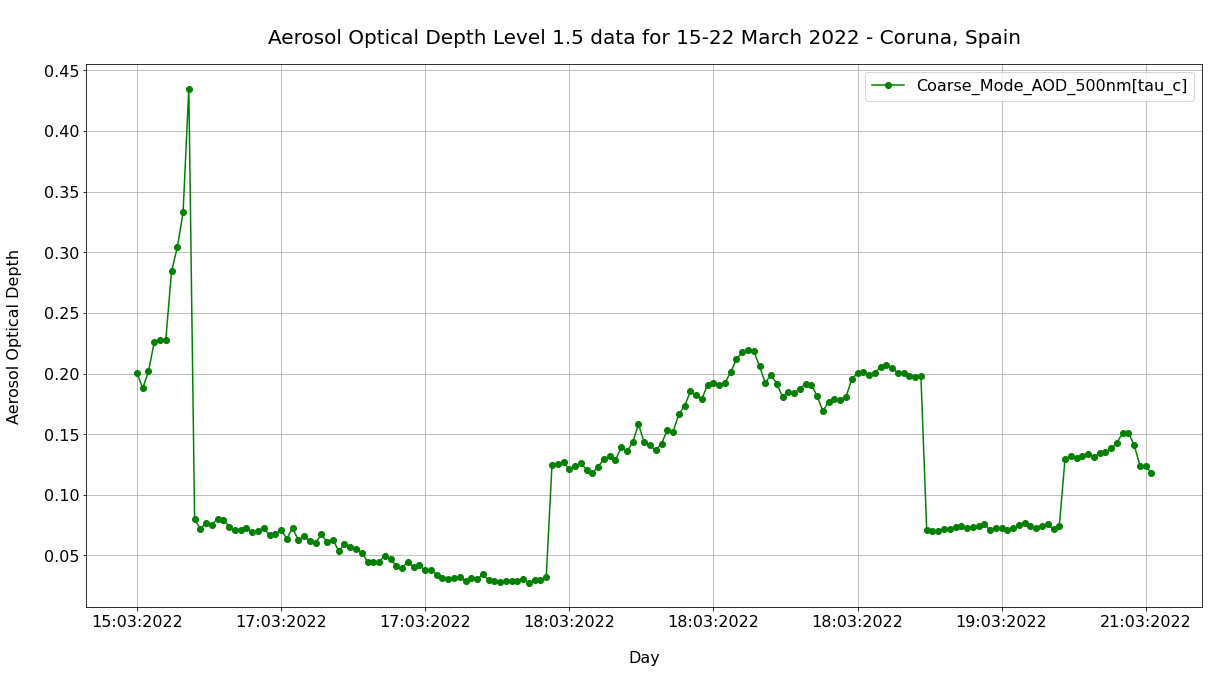

In [20]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax=plt.axes()

# Select pandas dataframe columns and define a line plot
df.filter(['Coarse_Mode_AOD_500nm[tau_c]']).plot(ax=ax, style='o-', color='green' )


# Set title and axes lable information
plt.title('\nAerosol Optical Depth Level 1.5 data for 15-22 March 2022 - Coruna, Spain', fontsize=20, pad=20)
plt.ylabel('Aerosol Optical Depth\n', fontsize=16)
plt.xlabel('\nDay', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=16,loc=0)
plt.grid()

Above you see that it seems we do not have observations for 16th, 20th and 22nd February 2020 for Coruna station in Spain. A closer inspection of the index entry confirms that we only have measurements for 15th, 17th, 18th, 19th and 21st of March 2022.

In [21]:
df.index.values

array(['15:03:2022', '15:03:2022', '15:03:2022', '15:03:2022',
       '15:03:2022', '15:03:2022', '15:03:2022', '15:03:2022',
       '15:03:2022', '15:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03:2022',
       '17:03:2022', '17:03:2022', '17:03:2022', '17:03

<br>

From the dataframe above, let us only select the columns of interest for us. This makes the handling of the dataframe much easier. The columns of interest are: `Time_(hh:mm:ss)` and `Coarse_Mode_AOD_500nm[tau_c]` and you can use the function `filter()` to select specific columns.

In [22]:
aeronet_ts = df.filter(['Time_(hh:mm:ss)','Coarse_Mode_AOD_500nm[tau_c]'])
aeronet_ts

,Time_(hh:mm:ss),Coarse_Mode_AOD_500nm[tau_c]
Date_(dd:mm:yyyy),,
15:03:2022,07:51:40,0.200623
15:03:2022,07:57:45,0.187887
15:03:2022,08:05:07,0.201768
15:03:2022,08:14:34,0.225937
15:03:2022,08:21:44,0.227399
...,...,...
21:03:2022,09:02:29,0.151077
21:03:2022,10:27:06,0.140905
21:03:2022,10:42:07,0.124073


The next step is to create an index as `DateTimeIndex`. For this, we want to first combine the index entries (date) and time stamp entries of the column `Time_(hh:mm:ss)`. We can do this simply by redefining the data frame's index and combining both with adding the two columns together as a string.

In a second step, we then convert the newly created index entry to a `DateTimeIndex` format with the function `to_datetime()`. Important here, you have to specify the format of combined index string.

In [23]:
aeronet_ts.index = aeronet_ts.index + ' ' + aeronet_ts['Time_(hh:mm:ss)']
aeronet_ts.index = pd.to_datetime(aeronet_ts.index, format = '%d:%m:%Y %H:%M:%S')
aeronet_ts

,Time_(hh:mm:ss),Coarse_Mode_AOD_500nm[tau_c]
2022-03-15 07:51:40,07:51:40,0.200623
2022-03-15 07:57:45,07:57:45,0.187887
2022-03-15 08:05:07,08:05:07,0.201768
2022-03-15 08:14:34,08:14:34,0.225937
2022-03-15 08:21:44,08:21:44,0.227399
...,...,...
2022-03-21 09:02:29,09:02:29,0.151077
2022-03-21 10:27:06,10:27:06,0.140905
2022-03-21 10:42:07,10:42:07,0.124073
2022-03-21 10:48:14,10:48:14,0.123622


<br>

The MONARCH model has a three hourly resolution. For this reason, we have to adjust the temporal resolution of the AERONET observations and resample the data frame to a three hourly temporal resolution. Below, we use the function `resample()` and create the average of every 3-hours. The resulting dataframe has 37 row entries.

In [24]:
aeronet_ts_resample = aeronet_ts.resample('3H').mean()
aeronet_ts_resample

,Coarse_Mode_AOD_500nm[tau_c]
2022-03-15 06:00:00,0.243630
2022-03-15 09:00:00,0.435052
2022-03-15 12:00:00,NaN
2022-03-15 15:00:00,NaN
2022-03-15 18:00:00,NaN
2022-03-15 21:00:00,NaN
2022-03-16 00:00:00,NaN
2022-03-16 03:00:00,NaN
2022-03-16 06:00:00,NaN
2022-03-16 09:00:00,NaN


<br>

### <a id='model_timeseries'></a>8. Load time series of the forecasts from CAMS and the MONARCH model

We can now load the time-series information of the CAMS and the MONARCH model forecasts for Coruna. The time-series has been saved as csv file. If you are using the file you downloaded yourself, please change the file path to the correct one. The time-series can be loaded as pandas.DataFrame with the function `read_csv()`.

The next step is then to convert the index of the loaded dataframe into a `DateTimeIndex` format, as this allows us to combine the different time-series.

In [25]:
sdswas_ts = pd.read_csv('../../eodata/dust/part2/3_model/sds_was/20220315/sdswas_ts.csv')
sdswas_ts.index = sdswas_ts['time']
sdswas_ts.index = pd.to_datetime(sdswas_ts.index, format = '%Y-%m-%d %H:%M:%S')
sdswas_ts

,time,lon,lat,od550_dust
time,,,,
2022-03-15 12:00:00,2022-03-15 12:00:00,-8.4,43.4,1.047896e-01
2022-03-15 15:00:00,2022-03-15 15:00:00,-8.4,43.4,1.947400e-01
2022-03-15 18:00:00,2022-03-15 18:00:00,-8.4,43.4,3.030339e-01
2022-03-15 21:00:00,2022-03-15 21:00:00,-8.4,43.4,2.542519e-01
2022-03-16 00:00:00,2022-03-16 00:00:00,-8.4,43.4,2.595825e-01
2022-03-16 03:00:00,2022-03-16 03:00:00,-8.4,43.4,2.737115e-01
2022-03-16 06:00:00,2022-03-16 06:00:00,-8.4,43.4,3.466450e-01
2022-03-16 09:00:00,2022-03-16 09:00:00,-8.4,43.4,1.662441e-01
2022-03-16 12:00:00,2022-03-16 12:00:00,-8.4,43.4,6.279883e-02


<br>

We repeat the same process for the time-series of the CAMS forecasts. We first read the csv file with the function `read_csv()`. If you are using the file you downloaded yourself, please change the file path to the correct one. Then, we convert the index into a `DateTimeIndex` format. 

In [26]:
cams_ts = pd.read_csv('../../eodata/dust/part2/3_model/cams/global_forecast/20220315/cams_ts.csv')
cams_ts.index = cams_ts['time']
cams_ts.index = pd.to_datetime(cams_ts.index, format='%Y-%m-%d %H:%M:%S')
cams_ts

,time,longitude,latitude,duaod550
time,,,,
2022-03-15 12:00:00,2022-03-15 12:00:00,-8.4,43.2,0.476617
2022-03-15 15:00:00,2022-03-15 15:00:00,-8.4,43.2,0.473984
2022-03-15 18:00:00,2022-03-15 18:00:00,-8.4,43.2,0.372591
2022-03-15 21:00:00,2022-03-15 21:00:00,-8.4,43.2,0.420837
2022-03-16 00:00:00,2022-03-16 00:00:00,-8.4,43.2,0.403681
2022-03-16 03:00:00,2022-03-16 03:00:00,-8.4,43.2,0.391608
2022-03-16 06:00:00,2022-03-16 06:00:00,-8.4,43.2,0.261348
2022-03-16 09:00:00,2022-03-16 09:00:00,-8.4,43.2,0.180016
2022-03-16 12:00:00,2022-03-16 12:00:00,-8.4,43.2,0.132632


All the three time-series (`aeronet_ts`, `sdswas_ts` and `cams_ts`) have now the same temporal resolution. The `DateTimeIndex` format allows for an efficient handling of time-series information and also allows us to combine the three time-series into one pandas.DataFrame. We can use the function `join()` and combine the two data frames `aeronet_ts_resample` and `sdswas_ts`. We can repeat the process to join the third column from the `cams_ts`.

The resulting dataframe has 37 row entries and three columns.

In [27]:
df_merged = aeronet_ts_resample.join(sdswas_ts['od550_dust'])
df_merged = df_merged.join(cams_ts['duaod550'])
df_merged

,Coarse_Mode_AOD_500nm[tau_c],od550_dust,duaod550
2022-03-15 06:00:00,0.243630,NaN,NaN
2022-03-15 09:00:00,0.435052,NaN,NaN
2022-03-15 12:00:00,NaN,1.047896e-01,0.476617
2022-03-15 15:00:00,NaN,1.947400e-01,0.473984
2022-03-15 18:00:00,NaN,3.030339e-01,0.372591
2022-03-15 21:00:00,NaN,2.542519e-01,0.420837
2022-03-16 00:00:00,NaN,2.595825e-01,0.403681
2022-03-16 03:00:00,NaN,2.737115e-01,0.391608
2022-03-16 06:00:00,NaN,3.466450e-01,0.261348
2022-03-16 09:00:00,NaN,1.662441e-01,0.180016


<br>

### <a id='compare_model_observations'></a> 9. Plot both model forecasts with the AERONET observations

Before plotting, make sure to rename the column using the following code. You can replace `df_merged` with the name of your merged dataframe.

In [28]:
df_merged.rename({'Coarse_Mode_AOD_500nm[tau_c]': 'Coarse_Mode_AOD_500nm'}, axis=1, inplace=True)

The last step is now to plot the three columns of the pandas.DataFrame `df_merged` as three individual line plots.

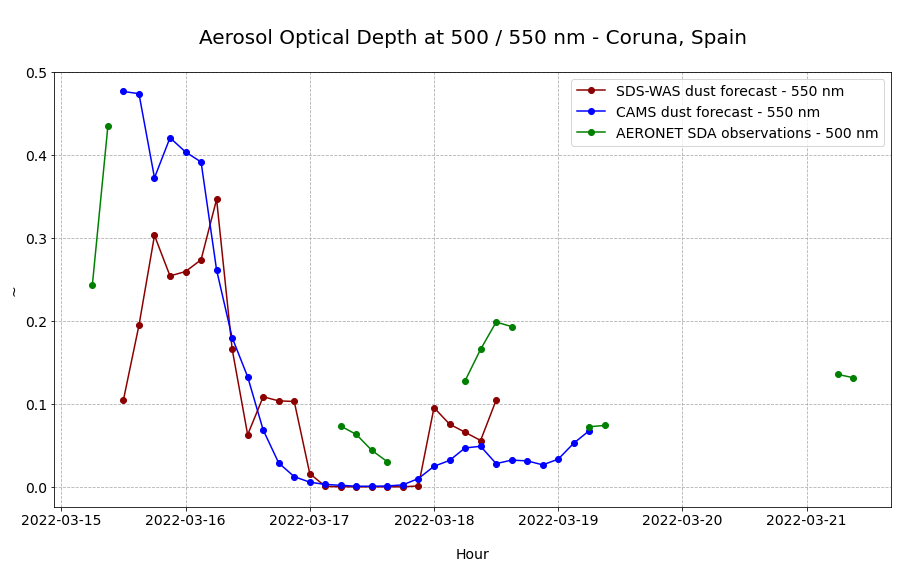

In [29]:
# Initiate a figure
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()

# Define the plotting function
ax.plot(df_merged.od550_dust, 'o-', color='darkred',  label='SDS-WAS dust forecast - 550 nm')
ax.plot(df_merged.duaod550, 'o-', color='blue', label='CAMS dust forecast - 550 nm')
ax.plot(df_merged.Coarse_Mode_AOD_500nm, 'o-', color='green', label='AERONET SDA observations - 500 nm')

# Customize the title and axes lables
ax.set_title('\nAerosol Optical Depth at 500 / 550 nm - Coruna, Spain\n', fontsize=20)
ax.set_ylabel('~', fontsize=14)
ax.set_xlabel('\nHour', fontsize=14)

# Customize the fontsize of the axes tickes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a gridline to the plot
ax.grid(linestyle='--')

plt.legend(fontsize=14, loc=1)


<br>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>